# Database Exploration

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from IPython.display import Image

The Berka dataset provides data about anonymized customers having financial accounts in a Czech bank. The data is hosted on a MariaDB database and the following scheme holds:

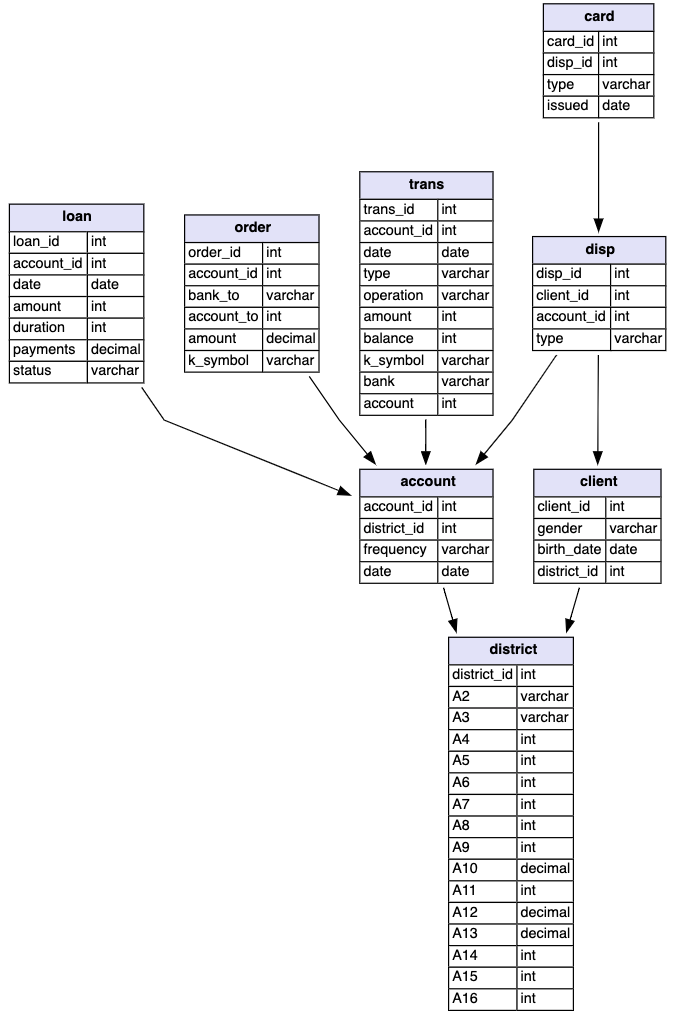

In [2]:
Image(filename='eer.png') 

Each table contains data regarding the customers and the objective of this study is understand whether a customer is eligible for a loan or not according to his/her history in the very same bank. Next step is to take under analysis each table with the description of the contained information:

## 1. Table 'client'

Identifies each customer in a unique way through a client id. Holds information about the customer regarding the gender, the date of birth and the demographic information id.

In [3]:
client_df = pd.read_csv('client.csv', index_col=0)
client_df.head()


,gender,birth_date,district_id
client_id,,,
1,F,1970-12-13,18
2,M,1945-02-04,1
3,F,1940-10-09,1
4,M,1956-12-01,5
5,F,1960-07-03,5


In [4]:
client_df.shape

(5369, 3)

<AxesSubplot:title={'center':'GENDER DISTRIBUTION IN BANK CUSTOMERS'}, ylabel='gender'>

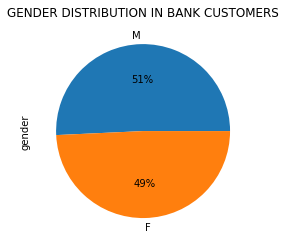

In [5]:
client_df['gender'].value_counts().plot.pie(
    title = 'GENDER DISTRIBUTION IN BANK CUSTOMERS',
    autopct='%1.0f%%'
)

<AxesSubplot:title={'center':'AGE DISTRIBUTION IN BANK CUSTOMERS'}, ylabel='Frequency'>

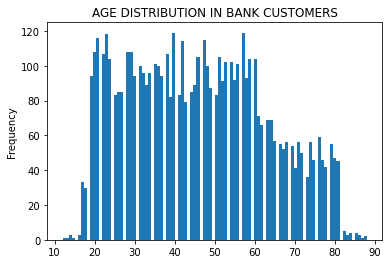

In [6]:
client_df['age'] = client_df['birth_date'].map(lambda x: 1999-int(x.split('-')[0]))
client_df['age'].plot.hist(
    title = 'AGE DISTRIBUTION IN BANK CUSTOMERS',
    bins = 100
)


<AxesSubplot:title={'center':'DISTRICT IDS DISTRIBUTION IN BANK CUSTOMERS'}, ylabel='Frequency'>

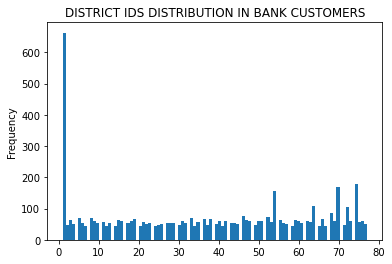

In [7]:
client_df['district_id'].plot.hist(
    title = 'DISTRICT IDS DISTRIBUTION IN BANK CUSTOMERS',
    bins = 100
)

In [8]:
client_df['district_id'].value_counts()

1     663
74    180
70    169
54    155
64    109
     ... 
65     44
58     44
12     44
24     43
20     43
Name: district_id, Length: 77, dtype: int64

The analyzed features are:
* gender: the distribution is fairly balanced between the two categories of male and female.
* age: the distribution is normally distributed with peaks between 20 and 60. Decreasing with elder people and very few clients among the younger ones.
* district id: the distribution is skewed towards the first district and seems fairly balanced towards all other districts.

## 2. Table 'district'

Holds public information about demographics in the Czech district where each customer belongs to, which gives more insights regarding the customers. The fields include information about:
* the district name (A2), 
* the region (A3), 
* number of inhabitants (A4), 
* number of municipalities with inhabitants (A5-A8), 
* number of cities (A9), 
* ratio of urban inhabitants (A10), 
* average salary (A11), 
* unemployment rate in 1995 and 1990 (A12-A13), 
* number of enterpreneurs per 1000 inhabitants (A14),
* number of crimes in 1995 and 1990 (A15-A16). 

In [9]:
district_df = pd.read_csv('district.csv', index_col=0)
district_df.head()

,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
district_id,,,,,,,,,,,,,,,
1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674
3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.9,2.21,111,2824.0,2813
4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.6,5.05,109,5244.0,5892
5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040


In [10]:
district_df.shape

(77, 15)

In [11]:
district_df['A3'].value_counts()

south Moravia      14
central Bohemia    12
north Moravia      11
east Bohemia       11
north Bohemia      10
west Bohemia       10
south Bohemia       8
Prague              1
Name: A3, dtype: int64

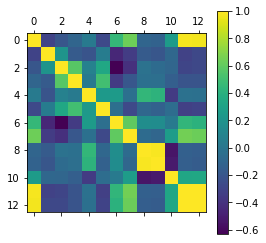

In [12]:
plt.matshow(district_df.corr())
plt.colorbar()

## 3. Table 'disp'

Allows the association between customers and accounts. Every account can be handled by more than one customer and the association is typed as 'owner' or 'disponent'. The cardinality is the same of the client table.

In [13]:
disp_df = pd.read_csv('disp.csv', index_col=0)
disp_df.head()

,client_id,account_id,type
disp_id,,,
1,1,1,OWNER
2,2,2,OWNER
3,3,2,DISPONENT
4,4,3,OWNER
5,5,3,DISPONENT


In [14]:
disp_df.shape

(5369, 3)

<AxesSubplot:title={'center':'PERCENTAGE OF ONE OR TWO PEOPLE HANDLING AN ACCOUNT'}, ylabel='type'>

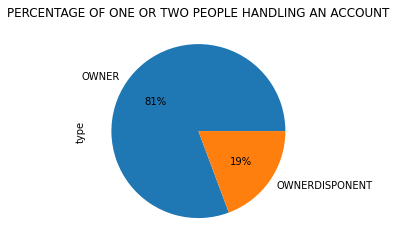

In [15]:
compact_types = disp_df.groupby('account_id').apply(lambda x: x.sum())
compact_types['type'].value_counts().plot.pie(
    title = 'PERCENTAGE OF ONE OR TWO PEOPLE HANDLING AN ACCOUNT',
    autopct = '%1.0f%%'
)

19% of the accounts is shared between two clients, an owner and a disponent, while the remaining 81% is handled by one client.

## 4. Table 'card'

Each account can have one single credit card at disposal. This table stores the information about each credit card granted by the bank to the customers. 

In [16]:
card_df = pd.read_csv('card.csv', index_col=0)
card_df.head()

,disp_id,type,issued
card_id,,,
1,9,gold,1998-10-16
2,19,classic,1998-03-13
3,41,gold,1995-09-03
4,42,classic,1998-11-26
5,51,junior,1995-04-24


In [17]:
card_df.shape

(892, 3)

In [18]:
card_df['disp_id'].value_counts().max()

1

<AxesSubplot:title={'center':'DISTRIBUTION OF CREDIT CARD TYPES'}, ylabel='type'>

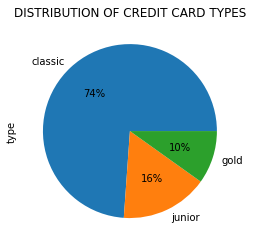

In [19]:
card_df['type'].value_counts().plot.pie(
    title = 'DISTRIBUTION OF CREDIT CARD TYPES',
    autopct = '%1.0f%%'
)

Not every account is linked to a credit card, and the maximum amount of credit cards that can be associated to an account is 1. One fourth of the accounts is associated to a classic credit card while the remaining cards are balanced between junior and gold.

## 5. Table 'account'

Holds basic information about accounts including the district the account is registered in, the date of registration and the frequency of statement issuance. 

In [20]:
account_df = pd.read_csv('account.csv', index_col=0)
account_df.head()

,district_id,frequency,date
account_id,,,
1,18,POPLATEK MESICNE,1995-03-24
2,1,POPLATEK MESICNE,1993-02-26
3,5,POPLATEK MESICNE,1997-07-07
4,12,POPLATEK MESICNE,1996-02-21
5,15,POPLATEK MESICNE,1997-05-30


In [21]:
account_df.shape

(4500, 3)

In [22]:
account_df['month'] = account_df['date'].apply(lambda x: x.split('-')[1])
account_df['year'] = account_df['date'].apply(lambda x: x.split('-')[0])
account_df['frequency'] = account_df['frequency'].map({
    'POPLATEK MESICNE': 'Monthly Issuance', 
    'POPLATEK TYDNE': 'Weekly Issuance',
    'POPLATEK PO OBRATU': 'Issuance After Transaction'
})
account_df

,district_id,frequency,date,month,year
account_id,,,,,
1,18,Monthly Issuance,1995-03-24,03,1995
2,1,Monthly Issuance,1993-02-26,02,1993
3,5,Monthly Issuance,1997-07-07,07,1997
4,12,Monthly Issuance,1996-02-21,02,1996
5,15,Monthly Issuance,1997-05-30,05,1997
...,...,...,...,...,...
11333,8,Monthly Issuance,1994-05-26,05,1994
11349,1,Weekly Issuance,1995-05-26,05,1995
11359,61,Monthly Issuance,1994-10-01,10,1994


<AxesSubplot:title={'center':'DISTRIBUTION OF ACCOUNT GENERATION OVER DIFFERENT MONTHS'}, ylabel='month'>

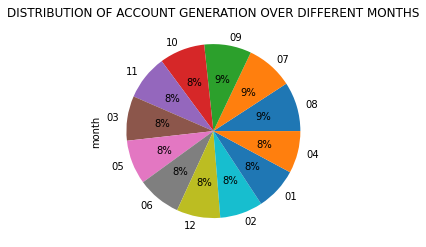

In [23]:
account_df['month'].value_counts().plot.pie(
    title = 'DISTRIBUTION OF ACCOUNT GENERATION OVER DIFFERENT MONTHS',
    autopct = '%1.0f%%'
)

<AxesSubplot:title={'center':'DISTRIBUTION OF DISTRICTS AMONG ACCOUNTS'}, ylabel='Frequency'>

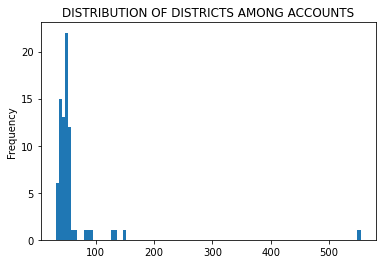

In [24]:
account_df['district_id'].value_counts().plot.hist(
    bins = 100,
    title = 'DISTRIBUTION OF DISTRICTS AMONG ACCOUNTS'
)

<AxesSubplot:title={'center':'DISTRIBUTION OF FREQUENCY OF STATEMENT ISSUANCE'}, ylabel='frequency'>

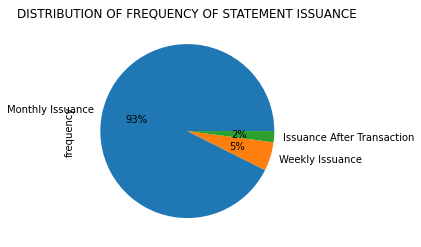

In [25]:
account_df['frequency'].value_counts().plot.pie(
    title = 'DISTRIBUTION OF FREQUENCY OF STATEMENT ISSUANCE',
    autopct = '%1.0f%%'
)

The dominant distribution of accounts for districts is the one from Prague since is the most densely populated district. The generation of accounts is fairly balanced over all the year. The majority (93%) of accounts has a monthly issuance type of account.

## 6. Table 'trans'

Contains information about transactions made from each account with details regarding:
* the date, 
* the kind of transaction (debit, credit), 
* how the transaction was executed (credit from cash/card, withdrawal in cash, another bank transfer),
* the amount of money,
* the balance after the transaction,
* the reason,
* the partner bank,
* the partner account.

In [26]:
trans_df = pd.read_csv('trans.csv')
trans_df.head()

/home/one/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,NaN,NaN,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,NaN,AB,41403269.0
2,6,1,1995-05-13,PRIJEM,PREVOD Z UCTU,3679,20977,NaN,AB,41403269.0
3,7,1,1995-06-13,PRIJEM,PREVOD Z UCTU,3679,26835,NaN,AB,41403269.0
4,8,1,1995-07-13,PRIJEM,PREVOD Z UCTU,3679,30415,NaN,AB,41403269.0


In [27]:
trans_df.shape

(1056320, 10)

<AxesSubplot:title={'center':'DISTRIBUTION OF TRANSACTION TYPES'}, ylabel='type'>

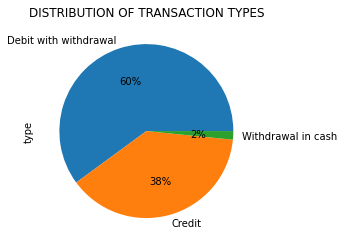

In [28]:
trans_df['type'] = trans_df['type'].map({
    'PRIJEM': 'Credit',
    'VYDAJ': 'Debit with withdrawal',
    'VYBER': 'Withdrawal in cash'
})
trans_df['type'].value_counts().plot.pie(
    title = 'DISTRIBUTION OF TRANSACTION TYPES',
    autopct = '%1.0f%%'
)

<AxesSubplot:title={'center':'DISTRIBUTION OF TRANSACTION OPERATIONS'}, ylabel='operation'>

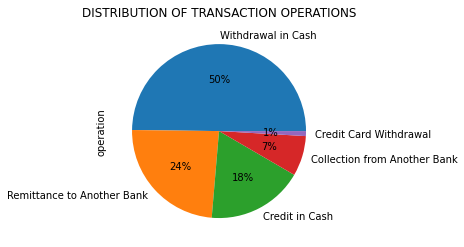

In [29]:
trans_df['operation'] = trans_df['operation'].map({
    'VYBER KARTOU': 'Credit Card Withdrawal',
    'VKLAD': 'Credit in Cash',
    'PREVOD Z UCTU': 'Collection from Another Bank',
    'VYBER': 'Withdrawal in Cash',
    'PREVOD NA UCET': 'Remittance to Another Bank'
})
trans_df['operation'].value_counts().plot.pie(
    title = 'DISTRIBUTION OF TRANSACTION OPERATIONS',
    autopct = '%1.0f%%'
)

In [30]:
trans_df['k_symbol'] = trans_df['k_symbol'].map({
    'POJISTNE': 'Insurance Payment',
    'SLUZBY': 'Payment of Statement',
    'UROK': 'Interest Credited',
    'SANKC. UROK': 'Sanction Interest if Negative Balance',
    'SIPO': 'Household Payment',
    'DUCHOD': 'Old-age Pension Payment',
    'UVER': 'Loan Payment'
})

trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,Credit,Credit in Cash,1000,1000,NaN,NaN,NaN
1,5,1,1995-04-13,Credit,Collection from Another Bank,3679,4679,NaN,AB,41403269.0
2,6,1,1995-05-13,Credit,Collection from Another Bank,3679,20977,NaN,AB,41403269.0
3,7,1,1995-06-13,Credit,Collection from Another Bank,3679,26835,NaN,AB,41403269.0
4,8,1,1995-07-13,Credit,Collection from Another Bank,3679,30415,NaN,AB,41403269.0


## 7. Table 'order'

Includes transactions that involve payments only. The details that are included with this data is the financial details of the receiving account (account id and bank), the amount of money and the reason.

In [31]:
order_df = pd.read_csv('order.csv', index_col=0)
order_df.head()

,account_id,bank_to,account_to,amount,k_symbol
order_id,,,,,
29401,1,YZ,87144583,2452.0,SIPO
29402,2,ST,89597016,3372.7,UVER
29403,2,QR,13943797,7266.0,SIPO
29404,3,WX,83084338,1135.0,SIPO
29405,3,CD,24485939,327.0,NaN


## 8. Table 'loan'

Includes issued loans to accounts alongside with other details like the date of issue, the amount, the duration, the payments per unit of duration and the current status. 

In [32]:
loan_df = pd.read_csv('loan.csv', index_col=0)
loan_df.head()

,account_id,date,amount,duration,payments,status
loan_id,,,,,,
4959,2,1994-01-05,80952,24,3373.0,A
4961,19,1996-04-29,30276,12,2523.0,B
4962,25,1997-12-08,30276,12,2523.0,A
4967,37,1998-10-14,318480,60,5308.0,D
4968,38,1998-04-19,110736,48,2307.0,C


<AxesSubplot:ylabel='status'>

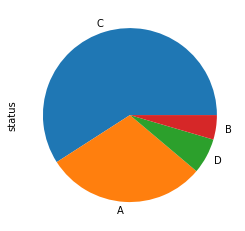

In [33]:
loan_df['status'].value_counts().plot.pie()